In [2]:
# Creat By GF 2023-07-18

# Python3_Project_时间维度分析.ipynb

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable

In [7]:
# 导入计算好的数据。

import Python3_Project_RFM_Building_Data

df = Python3_Project_RFM_Building_Data.df

In [8]:
# 2019-2021年每月销量走势。

In [9]:
# 1. 先把年份和月份提取出来。

df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month

# 同时提取年份和月份。
df["year_month"] = df["time"].dt.strftime('%Y%m')
             
df

,time,fruit,name,kilogram,price,region,amount,year,month,year_month
0,2019-01-01,芭乐,Jhon,76,4.9,华南,372.4,2019,1,201901
1,2019-01-02,橙子,Jhon,89,6.8,华中,605.2,2019,1,201901
2,2019-01-03,桃子,Xiaoming,78,7.0,华中,546.0,2019,1,201901
3,2019-01-04,橙子,Xiaoming,79,6.8,华中,537.2,2019,1,201901
4,2019-01-05,苹果,Jhon,60,8.9,华北,534.0,2019,1,201901
...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,葡萄,Jhon,78,12.8,西北,998.4,2021,12,202112
1092,2021-12-28,桃子,Jimmy,59,7.0,华中,413.0,2021,12,202112
1093,2021-12-29,橙子,Michk,86,6.8,华中,584.8,2021,12,202112
1094,2021-12-30,桃子,Xiaoming,65,7.0,华中,455.0,2021,12,202112


In [10]:
# 2. 查看字段类型。

df.dtypes

time          datetime64[ns]
fruit                 object
name                  object
kilogram               int32
price                float64
region                object
amount               float64
year                   int64
month                  int64
year_month            object
dtype: object

In [11]:
# 3. 分年月统计并展示。

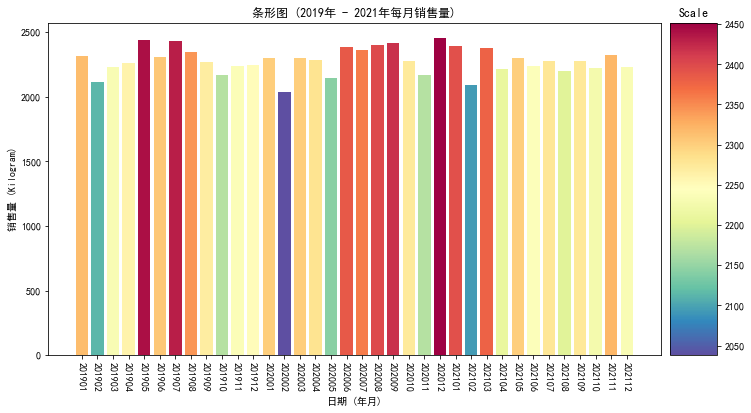

In [71]:
# 分年月统计销量。
df_year_month_kg = df.groupby(["year_month"])["kilogram"].sum().reset_index()

# --------------------------------------------------

# 设置字体使之支持中文显示。
plt.rcParams['font.sans-serif'] = ['SimHei']

# 创建一个12*6点的画布，设置分辨率为72。
fig = plt.figure(figsize=(12, 6), dpi=72)

# ColorBar 相关函数。
scales = df_year_month_kg["kilogram"].values.tolist()
# "Spectral" 为正序 (由红到蓝)，"Spectral_r" 为倒序 (由蓝到红)。
cmap = plt.get_cmap("Spectral_r")
norm = plt.Normalize(min(scales), max(scales))

# 绘制条形图。
ax1 = plt.subplot2grid((6, 12), (0, 0), rowspan=6, colspan=11)
for x, y in zip(df_year_month_kg["year_month"], scales):
    ax1.bar(x, y, color=[cmap(norm(y))])

ax1.set_title("条形图 (2019年 - 2021年每月销售量)")
ax1.tick_params(axis='x', labelrotation=-90) # -> 将 X 轴刻度标签旋转 90 度 (正数为逆时针，负数为顺时针)。
ax1.set_xlabel("日期 (年月)")
ax1.set_ylabel("销售量 (Kilogram)")
#ax1.set_grid(True)

# 绘制 ColorBar。
ax2 = plt.subplot2grid((6, 12), (0, 11), rowspan=6, colspan=1)
sm =  ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, cax=ax2)
cbar.ax.set_title("Scale")

plt.show()

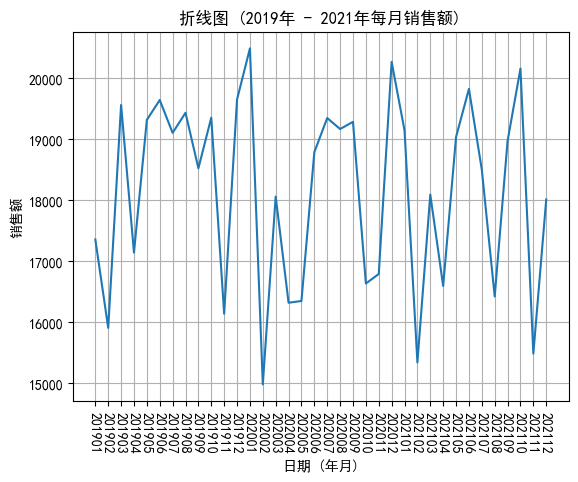

In [14]:
# 2019-2021销售额走势。

df_year_month_amt = df.groupby(["year_month"])["amount"].sum().reset_index()
 
df_year_month_amt["amount"] = df_year_month_amt["amount"].apply(lambda x:round(x,2))

# --------------------------------------------------

# 设置字体使之支持中文显示。
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.plot(df_year_month_amt["year_month"], df_year_month_amt["amount"])
 
plt.title("折线图 (2019年 - 2021年每月销售额)")
plt.xticks(rotation=-90) # -> 将 X 轴刻度标签旋转 90 度 (正数为逆时针，负数为顺时针)。
plt.xlabel("日期 (年月)")
plt.ylabel("销售额")
plt.grid(True)

plt.show()

In [15]:
# 年度销量、销售额和平均销售额。

# 年度销量、销售额。

df_gather = df.groupby("year").agg({"kilogram": "sum", "amount": "sum"}).reset_index()

df_gather

,year,kilogram,amount
0,2019,27370,221137.4
1,2020,27522,216482.0
2,2021,27154,215586.0


In [16]:
# 年度平均每公斤销售额。

df_gather["mean_amount"] = df_gather["amount"] / df_gather["kilogram"]

df_gather

,year,kilogram,amount,mean_amount
0,2019,27370,221137.4,8.079554
1,2020,27522,216482.0,7.865780
2,2021,27154,215586.0,7.939383
